# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Malus-with-two-polarizers:-fitting" data-toc-modified-id="Malus-with-two-polarizers:-fitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Malus with two polarizers: fitting</a></div><div class="lev2 toc-item"><a href="#Loading" data-toc-modified-id="Loading-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading</a></div><div class="lev3 toc-item"><a href="#Fitting-functions" data-toc-modified-id="Fitting-functions-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Fitting functions</a></div><div class="lev3 toc-item"><a href="#Drawing-function" data-toc-modified-id="Drawing-function-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Drawing function</a></div><div class="lev2 toc-item"><a href="#Load-intensity-with-no-polarizers" data-toc-modified-id="Load-intensity-with-no-polarizers-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load intensity with no polarizers</a></div><div class="lev2 toc-item"><a href="#Load-intensity-with-1-polarizer" data-toc-modified-id="Load-intensity-with-1-polarizer-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load intensity with 1 polarizer</a></div><div class="lev3 toc-item"><a href="#Results" data-toc-modified-id="Results-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Results</a></div><div class="lev2 toc-item"><a href="#Load-intensity-with-2-polarizers" data-toc-modified-id="Load-intensity-with-2-polarizers-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load intensity with 2 polarizers</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev3 toc-item"><a href="#Results" data-toc-modified-id="Results-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Results</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Calibration parameters</a></div>

# Malus with two polarizers: fitting

Author: Luis Miguel Sanchez Brea

Date:   17/01/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 314 mA)
We have lens for collimating and Thorlabs DG10-600-B diffuser

We have polarizer 1 Thorlabs LPNIRE100-B
We have polarizer 4 Thorlabs LPNIRE100-B

Polarizer 1 is placed at 0º, arbitrarily

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

\begin{equation}
P_L(0)=\left[\begin{array}{cc}
p_1 & 0  \\
0 & p_2
\end{array}\right]
\end{equation}

After this formalism, we pass to Mueller using Jones-Mueller Transformation 

## Loading

In [1]:
from __future__ import print_function

%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:898: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hickle as hkl
import time
import pprint
from scipy import optimize



In [30]:
from phyton_optics import um, degrees

from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller,
    retarder, rotation)

from polarimeter.polarimeter import get_polarimeter_parameters

### Fitting functions

In [31]:
# Fit the first set
sin_func = lambda par, x: par[0]+par[1]*np.cos(2*np.pi/par[2]*(x-par[3])) # Target function
errfunc = lambda par, x, y: sin_func(par, x) - y # Distance to the target function

### Drawing function

In [32]:
def draw(angle, I_experimental, I_fitting,  title=''):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    plt.plot(angle, I_experimental, "ro")
    plt.plot(angle,I_fitting , "r-") # Plot of the data and the fit

    residuals=I_fitting-I_experimental
    #p_changed=[p1[0], -p1[1], p1[2], p1[3]+90]
    #y_fitting_changed=fitfunc(p_changed, positions)
    #plt.plot(positions, y_fitting_changed, 'g')

    plt.title(title)
    plt.subplot(2,2,2)
    plt.plot(angle, residuals)
    plt.title('residuals')
    plt.show()

## Load intensity with no polarizers
With this experiment we determine the initial intensity I0 of the source

In [33]:
data_0=np.load('I_malus_0_180219.npy')
intensities_0=data_0[:,1]
I0=sp.mean(intensities_0)

In [34]:
plt.figure()
plt.plot(intensities_0,'k')
plt.ylim(I0*0.9,I0*1.1)

(3.1580042830156163, 3.8597830125746424)

In [35]:
# Result
print("Intensity with no polarizers={:4.4f}".format(I0))

Intensity with no polarizers=3.5089


## Load intensity with 1 polarizer
With this experiment we determine the circularity of the light source after passing through a waveplate

In [36]:
#Load data and represent

data_1=np.load('I_malus_1_180219.npy')
angles_1=data_1[:,0]
intensities_1=data_1[:,1]
I1=sp.mean(intensities_1)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(angles_1,intensities_1,'k')
plt.ylim(0,I1*1.1)

plt.subplot(122)
plt.plot(angles_1,intensities_1,'k')
plt.ylim(I1*0.9,I1*1.1)

(1.533200873215683, 1.8739121783747237)

### Results


In [37]:
#Fitting parameters 

# par[0]+par[1]*np.cos(2*np.pi/par[2]*(x-par[3]))
par0 = [1.75,0.1, 180, 0.] # Initial guess for the parameters
par1, success = optimize.leastsq(errfunc, par0[:], args=(angles_1, intensities_1))
print(par1)

[   1.70341281    0.01192773  179.23283086  -18.2081855 ]


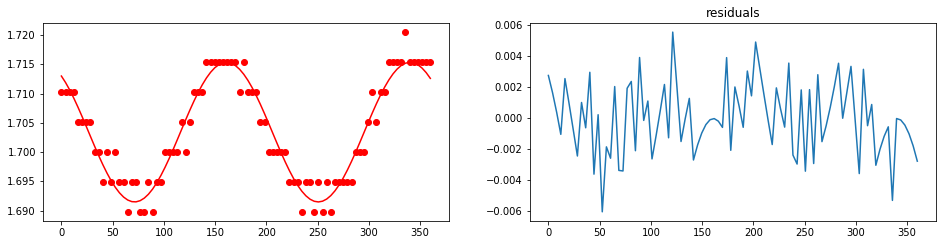

In [38]:
I_fitting=sin_func(par1, angles_1)
residuals=intensities_1-I_fitting

draw(angles_1, intensities_1, I_fitting,  title='')

In [39]:
I_mean=par1[0]
I_fluctuation=par1[1]
angle_min=par1[3]

print("Average intensity   = {:4.5}".format(I_mean))
print("Amplitude lineality = {:4.5}".format(I_fluctuation))
print("Angle min           = {:4.5}".format(angle_min))

Average intensity   = 1.7034
Amplitude lineality = 0.011928
Angle min           = -18.208


This means that light is not purely circular, but it has a small component of elipticity.
We can determine the input light parameters by adjusting this parameters.

In [40]:
#Fitting parameters 
# Fit the first set
sin_func = lambda par, x: par[0]+par[1]*np.cos(2*np.pi/par[2]*(x-par[3])) # Target function
errfunc = lambda par, x, y: sin_func(par, x) - y # Distance to the target function

In [106]:
def I_incident_theory(par, theta):
    amplitude, angle, phase = par
    u0=polarized_light(amplitude, angle, phase, 1 )
   
    pol_param=get_polarimeter_parameters(kind='real')
    pol1,_,_,_=pol_param

    if type(theta) in [float, int]:
        P1 = polarizer_linear(p1=pol1['p1'], p2=pol1['p0'], theta=theta)
        I1= intensity(P1 * u0)    
    else:
        I1=sp.zeros_like(theta, dtype=float)
        for i, theta_i in enumerate(theta):
            P1 = polarizer_linear(p1=pol1['p1'], p2=pol1['p0'], theta=theta_i)
            I1[i] = intensity(P1 * u0)
    
    return I1
    

In [129]:
amplitude=2.16507003
angle=44.83532879 *degrees
phase=90.25795633*degrees
par= amplitude, angle, phase
I_t=I_incident_theory(par, theta=angles_1*degrees)

plt.figure()
plt.plot(angles_1, I_t,'k')

In [110]:
err_func_I_incident = lambda par, x, y: I_incident_theory(par, x) - y # Distance to the target function

par0 = [1.7, sp.pi / 4, sp.pi / 2] # amplitude, angle, phase, poldegree=1
par1, success = optimize.leastsq(err_func_I_incident, par0[:], args=(angles_1*degrees, intensities_1))
print(par1, par1/degrees)

[ 2.16507003  0.78252411  1.57529851] [ 124.04937506   44.83532879   90.25795633]


In [118]:
# Obtenido
I_fitting=I_incident_theory(par1, angles_1*degrees)
residuals=intensities_1-I_fitting
draw(angles_1, intensities_1, I_fitting,  title='')

I_fitting2=I_incident_theory([2.165, sp.pi/4, sp.pi/2], angles_1*degrees)
residuals=intensities_1-I_fitting2
draw(angles_1, intensities_1, I_fitting2,  title='')

## Load intensity with 2 polarizers


In [157]:
data_2=np.load('I_malus_2_180219.npy')
angles_2=data_2[:,0]
intensities_2=data_2[:,1]

plt.figure()
plt.plot(angles_2,intensities_2,'k')
plt.ylim(0,intensities_2.max()*1.1)

(0, 1.5492084758123383)

## Fitting data to sine

Fit examples with sinusoidal functions

In [158]:
par0 = [1.25,2.5, 180, 0.] # Initial guess for the parameters
par1, success = optimize.leastsq(errfunc, par0[:], args=(angles_2, intensities_2))

if par1[3]<0:
    par1[3]=par1[3]+180

if**

I_fitting=sin_func(par1, angles_2)
residuals=intensities_2-I_fitting

draw(angles_2, intensities_2, I_fitting,  title='')

### Results

In [154]:
print(par1)
print(sp.std(residuals))

[   0.72992492   -0.67823391  180.04233967  160.44493762]
0.00261029517818


In [156]:
Imin=par1[1]-par1[0]
Imax=par1[0]+par1[1]
I0 = I0
angle4_max=par1[3]

if Imin<Imax:
    Imin,Imax=Imax,Imin


print("I0        = {:4.4} V".format(I0))
print("Imin      = {:4.4} V".format(Imin))
print("Imax      = {:4.4} V".format(Imax))
print("angle_max = {:4.5} º".format(angle4_max))


I0        = 3.509 V
Imin      = 0.05169 V
Imax      = -1.408 V
angle_max = 160.44 º


## Calibration parameters

In [151]:
p0=((Imax+sp.sqrt(Imax**2-Imin**2))/I0)**(0.25)
p1=sp.sqrt(Imin/sp.sqrt(I0*(Imax+sp.sqrt(Imax**2-Imin**2))))
if p0>p1:
    p0,p1=p1,p0
print(p0, p1)

(0.738100605256-0.297823587289j) (0.738100605256+0.297823587289j)


In [145]:
p0=((Imax-sp.sqrt(Imax**2-Imin**2))/I0)**(0.25)
p1=p0*sp.sqrt((Imax+sp.sqrt(Imax**2-Imin**2))/Imin)
print(p0, p1)

(0.738100605256-0.297823587289j) (0.738100605256+0.297823587289j)


______

18/02/14 - 
   - **p0 = 0.0653499037607, p1 = 0.758623923874, theta_4= 70.306º**
   - std adjustement to fit: 0.0022851062668 V = 0.19% 
 
______
 
18/02/19 - más preciso: nos quedamos con estos:

angle = 70.445º, min_intensity = 0.051691 V, max_intensity =1.4082
intensities: min = 0.052407 V, max = 1.4084 V
   - **p0 = 0.128242248318, p1 = 0.946436027636, theta_4= 70.445º**
   - std adjustement to fit: 0.0025373028673 V = 0.19%
______

